# Stock Market EDA Notebook 📈

**Purpose:** Exploratory Data Analysis for OHLC stock data. Includes charts, technical indicators, volatility, returns, and templates for modelling.


In [37]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator, DayLocator, MONDAY
import seaborn as sns



## Load your data
Set `DATA_PATH` to your file (CSV). The notebook will parse dates and sort by date.


In [20]:
df=pd.read_csv('stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## Basic information & summary

In [21]:
print('Shape:', df.shape)
display(df.info())
display(df.describe(include='all'))

Shape: (248, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


None

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
unique,4,62,NaN,NaN,NaN,NaN,NaN,NaN
top,AAPL,2023-02-07,NaN,NaN,NaN,NaN,NaN,NaN
freq,62,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,NaN,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,NaN,NaN,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,NaN,NaN,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,NaN,NaN,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,NaN,NaN,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07


## Missing values and data types

In [22]:
display(df.isna().sum())
display(df.dtypes)

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
# date column datatype changing
df['Date'] = pd.to_datetime(df['Date'])
display(df.dtypes)

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Work on a single ticker (time series index)
Choose a ticker to focus analysis on.

In [24]:
# Select ticker
ticker = df['Ticker'].unique()[0]
ts = df[df['Ticker']==ticker].set_index('Date').sort_index()
ts_head = ts.head()
print('Selected ticker:', ticker)
ts_head

Selected ticker: AAPL


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## Close Price Line Chart

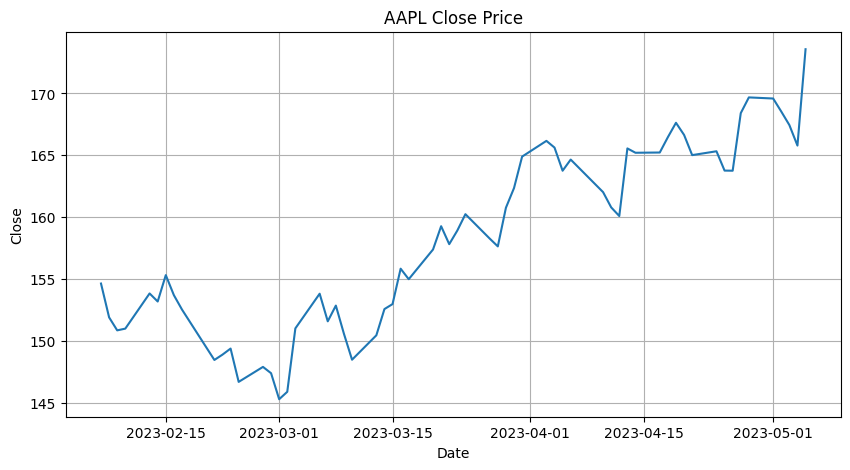

In [25]:
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts['Close'])
plt.title(f'{ticker} Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

## Candlestick chart (simple implementation)
This draws a vertical line for low-high and a rectangle for open-close. Works without external libs.

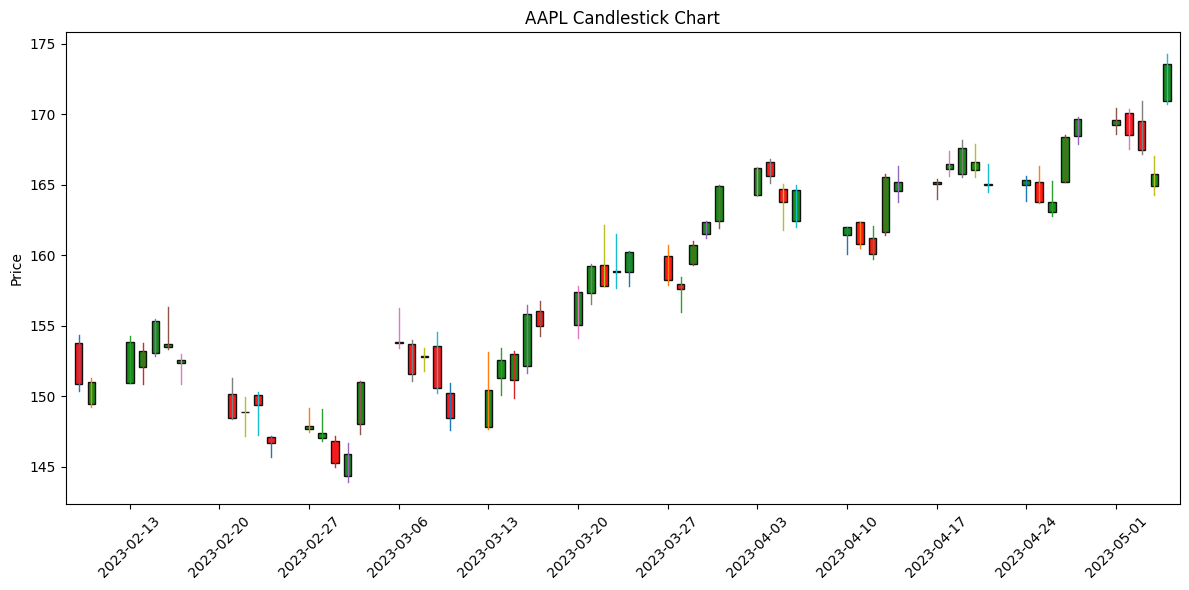

In [26]:
def plot_candlestick(data, ax=None, width=0.6):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    dates = date2num(data.index.to_pydatetime())
    for idx, (d, row) in enumerate(data.iterrows()):
        openp, highp, lowp, closep = row['Open'], row['High'], row['Low'], row['Close']
        color = 'g' if closep >= openp else 'r'
        # wick
        ax.plot([dates[idx], dates[idx]], [lowp, highp], linewidth=1)
        # body
        lower = min(openp, closep)
        height = abs(closep - openp)
        rect = Rectangle((dates[idx]-width/2, lower), width, height if height>0 else 0.0001, alpha=0.9)
        ax.add_patch(rect)
        rect.set_edgecolor('k')
        rect.set_facecolor(color)
    ax.set_xlim(dates[0]-1, dates[-1]+1)
    ax.xaxis_date()
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=MONDAY))
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.set_ylabel('Price')
    plt.xticks(rotation=45)
    plt.title(f'{ticker} Candlestick Chart')
    plt.tight_layout()

# Plot candlestick for the selected ticker (last 60 rows if available)
plot_candlestick(ts[-60:])
plt.show()

## Moving averages, Returns, Volatility, and Technical Indicators

In [27]:
# Indicators
ts['SMA_20'] = ts['Close'].rolling(20, min_periods=1).mean()
ts['SMA_50'] = ts['Close'].rolling(50, min_periods=1).mean()
ts['EMA_20'] = ts['Close'].ewm(span=20, adjust=False).mean()

# Returns and volatility
ts['LogReturn'] = np.log(ts['Close'] / ts['Close'].shift(1))
ts['DailyReturn'] = ts['Close'].pct_change()
ts['Volatility_20'] = ts['LogReturn'].rolling(window=20).std() * np.sqrt(252)  # annualized

# MACD
exp12 = ts['Close'].ewm(span=12, adjust=False).mean()
exp26 = ts['Close'].ewm(span=26, adjust=False).mean()
ts['MACD'] = exp12 - exp26
ts['MACD_Signal'] = ts['MACD'].ewm(span=9, adjust=False).mean()

# RSI
delta = ts['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ma_up = up.rolling(14).mean()
ma_down = down.rolling(14).mean()
rs = ma_up / ma_down
ts['RSI_14'] = 100 - (100/(1+rs))

ts_tail = ts.tail()
display(ts_tail[['Close','SMA_20','SMA_50','EMA_20','MACD','MACD_Signal','RSI_14','Volatility_20']])

,Close,SMA_20,SMA_50,EMA_20,MACD,MACD_Signal,RSI_14,Volatility_20
Date,,,,,,,,
2023-05-01,169.589996,165.2730,158.2206,164.890355,2.521317,2.437335,72.619669,0.193525
2023-05-02,168.539993,165.3915,158.5404,165.237939,2.508266,2.451521,71.334667,0.193833
2023-05-03,167.449997,165.4825,158.9198,165.448612,2.382506,2.437718,56.132384,0.195046
2023-05-04,165.789993,165.5840,159.2574,165.481124,2.124402,2.375055,51.734409,0.193980
2023-05-05,173.570007,166.0295,159.7408,166.251494,2.518603,2.403765,67.034319,0.251758


### Close price with SMA & EMA

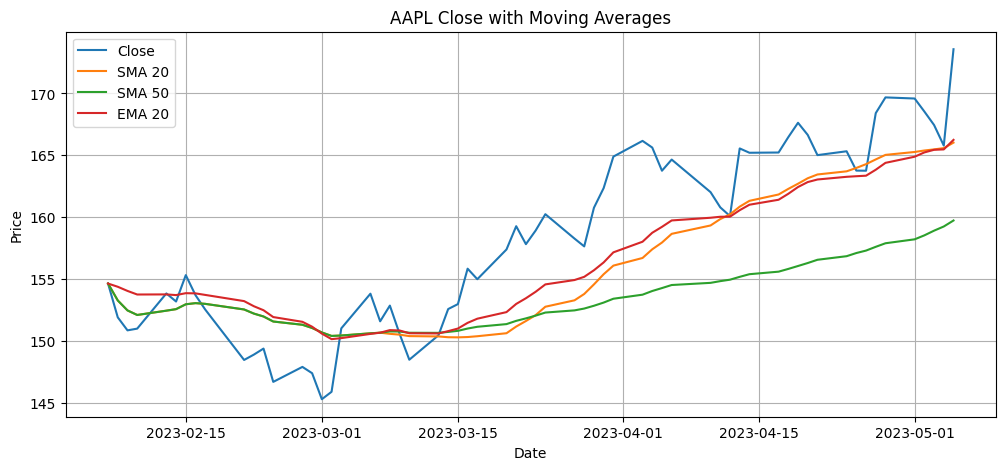

In [28]:
plt.figure(figsize=(12,5))
plt.plot(ts.index, ts['Close'], label='Close')
plt.plot(ts.index, ts['SMA_20'], label='SMA 20')
plt.plot(ts.index, ts['SMA_50'], label='SMA 50')
plt.plot(ts.index, ts['EMA_20'], label='EMA 20')
plt.legend()
plt.title(f'{ticker} Close with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### MACD & RSI

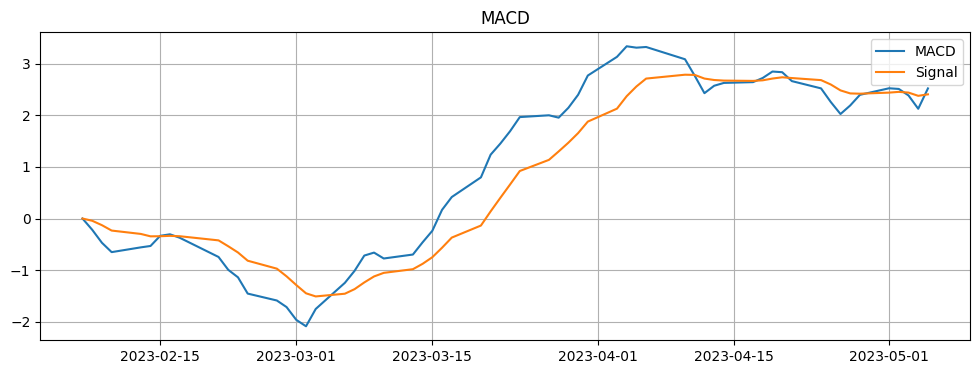

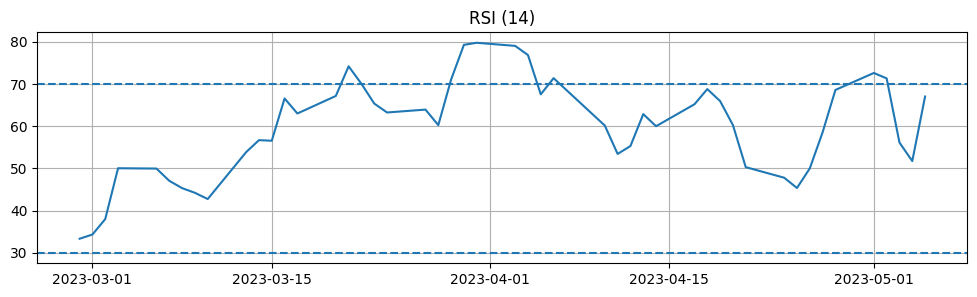

In [29]:
plt.figure(figsize=(12,4))
plt.plot(ts.index, ts['MACD'], label='MACD')
plt.plot(ts.index, ts['MACD_Signal'], label='Signal')
plt.legend()
plt.title('MACD')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(ts.index, ts['RSI_14'])
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.title('RSI (14)')
plt.grid(True)
plt.show()

## Volume Analysis

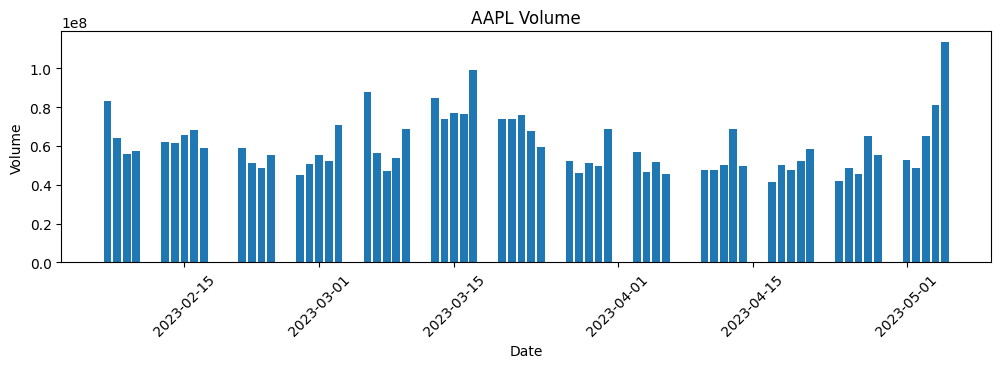

In [30]:
plt.figure(figsize=(12,3))
plt.bar(ts.index, ts['Volume'])
plt.title(f'{ticker} Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

## Correlation between numerical columns

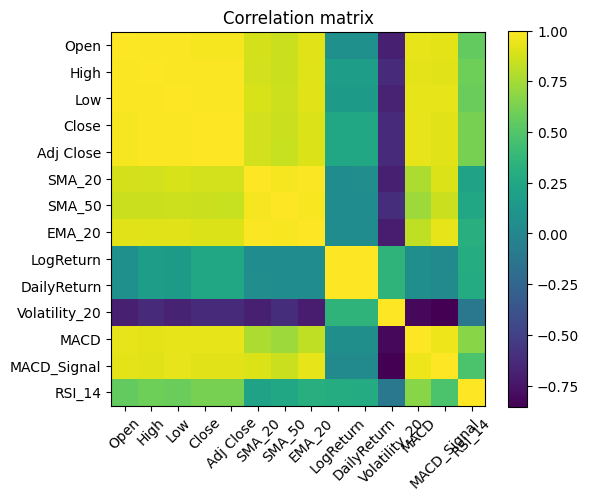

In [31]:
num = ts.select_dtypes(include=[np.number]).drop(columns=['Volume'], errors='ignore')
corr = num.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

## Returns distribution & rolling volatility

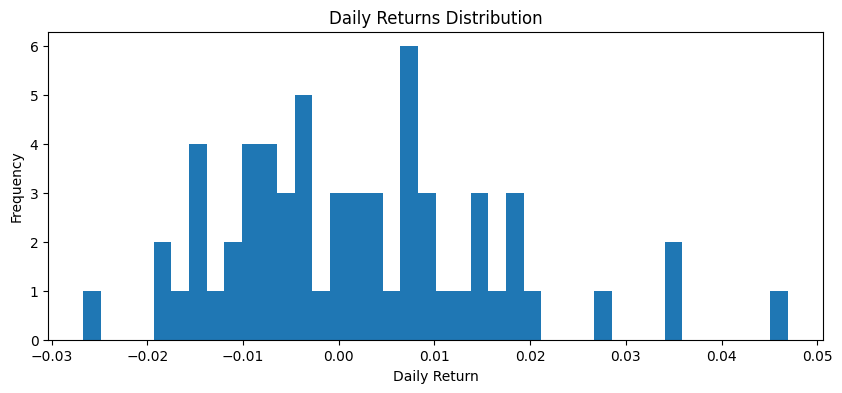

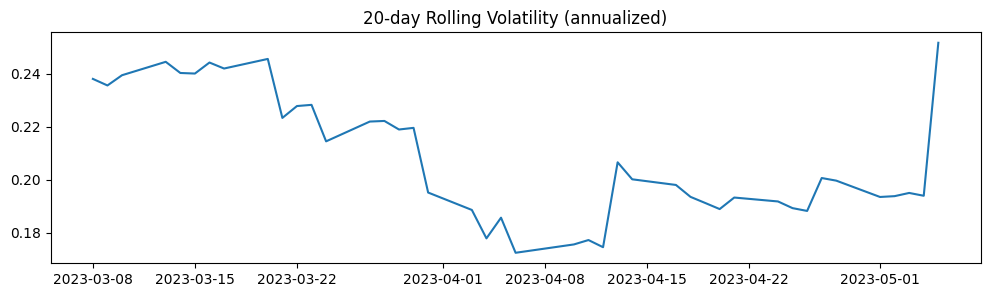

In [32]:
plt.figure(figsize=(10,4))
plt.hist(ts['DailyReturn'].dropna(), bins=40)
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(ts.index, ts['Volatility_20'])
plt.title('20-day Rolling Volatility (annualized)')
plt.show()

## Forecasting template
This is a simple placeholder. For actual forecasting consider ARIMA / Prophet / ETS models.
If you use Prophet, you need to `pip install prophet` then format data as `ds` and `y`. 

In [33]:
# Simple train/test split placeholder
train = ts['Close'].iloc[:-10]
test = ts['Close'].iloc[-10:]
print('Train length:', len(train), 'Test length:', len(test))

# Example placeholder for naive forecast (last observed value)
naive_forecast = np.repeat(train.iloc[-1], len(test))
pd.DataFrame({'y_true': test.values, 'naive_forecast': naive_forecast}, index=test.index)

Train length: 52 Test length: 10


,y_true,naive_forecast
Date,,
2023-04-24,165.330002,165.020004
2023-04-25,163.770004,165.020004
2023-04-26,163.759995,165.020004
2023-04-27,168.410004,165.020004
2023-04-28,169.679993,165.020004
2023-05-01,169.589996,165.020004
2023-05-02,168.539993,165.020004
2023-05-03,167.449997,165.020004
2023-05-04,165.789993,165.020004


## THANK YOU 